In [2]:
import numpy as np
import random
import hgenotypes as hg
import matplotlib.pyplot as plt

In [3]:
#Initial sequence
s0 = hg.Genotype(1, hg.our_reference_sequence_qbeta)
alphabet = ['A', 'C', 'G', 'T']

def distance(seq, seq_ref):
    '''
        Function that returns the Humming distance between
        two sequences
        Input:
            -sequence to compare
            -reference sequence
        Return:
            -int : distance
    '''
    d=0
    for char in range(len(seq_ref)):
        if seq[char] != seq_ref[char]:
            d+=1
    return d

def do_mutation(sequence):
    '''
        Function that, given a sequence, returns a mutation
    '''
    global alphabet
    L = len(sequence)
    i = random.randint(0,L-1)
    nucl = random.choice(alphabet)
    while nucl == sequence[i]:
        nucl = random.choice(alphabet)
    if i<L:
        seq_new = sequence[:i] + nucl + sequence[i+1:]
    else:
        seq_new = sequence[:L-1] + nucl
    return seq_new

def calculateParametersLSR(x, y):
	"""
	Function that calculates w* and b* for a least square regression and the standard error for b*
	Inputs:
		x: array containing the x-values in log-scale
		y: array containing the y-values in log-scale
	Outputs:
		b: float containing the intercept term of the regression line
		w: float containing the slope of the regression line
		SEw: float containing the standard error of b*
	"""

	meanTarget = np.mean(y)
	meanFeature = np.mean(x)

	centeredTarget = y - meanTarget
	centeredFeature = x - meanFeature

	w = (centeredFeature @ centeredTarget)/(centeredFeature @ centeredFeature)

	b = meanTarget - w *  meanFeature

	# Standard error
	yHat = b + w * x
	n = x.shape[0]

	SEw = np.sqrt((1/(n - 2)) * ((np.sum(np.power((y - yHat), 2)))/(np.sum(np.power((x - meanFeature), 2)))))



	return b, w, SEw

In [13]:
#Simple sequence that mutates
t_max = 10**3
n_iterations = 10**2

time = np.array(range(t_max))
distance_t = {t:[] for t in range(t_max)}

mu = 10**-3
L = len(hg.our_reference_sequence_qbeta)

f_dict = {hg.our_reference_sequence_qbeta: 1}
p = 0.605

for i in range(n_iterations):    
    s = s0
    distance_t[0].append(distance(s.sequence, s0.sequence))

    for t in range(1,t_max):
        jump = np.random.poisson(mu*L)
        if f_dict[s.sequence]:
            s = s.mutate(n_muts=jump)
            if s.sequence in f_dict.keys():
                pass
            else:
                r = random.random()
                if r<=p:
                    f_dict[s.sequence] = 1
                else:
                    f_dict[s.sequence] = 0
                
                    
            #s = hg.Genotype(1, do_mutation(s.sequence))
        distance_t[t].append(distance(s.sequence, s0.sequence)**2)
        


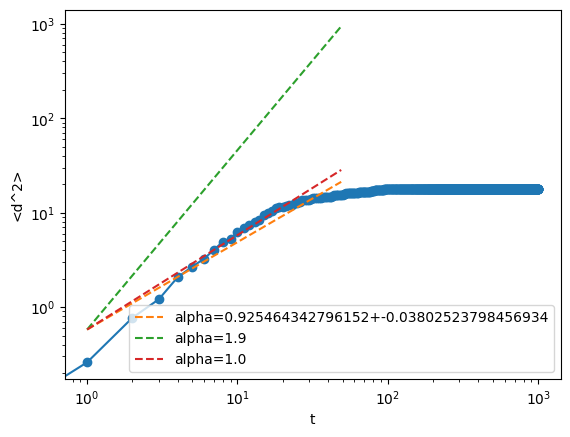

In [14]:
position = [np.array(distance_t[t]).mean() for t in range(t_max)]
plt.plot(time, position, 'o-')

t_fit_max = 5*10**1

b,w,E = calculateParametersLSR(np.log2(np.array(time[1:t_fit_max])), np.log2(np.array(position[1:t_fit_max])))
x_aster = time[1:t_fit_max]
y_aster = 2**b*x_aster**(w)
theor_alpha = 1.90
plt.plot(x_aster, y_aster, '--', label=f'alpha={w}+-{E}')
plt.plot(x_aster, 2**b*x_aster**(1.90), '--', label=f'alpha={1.9}')
plt.plot(x_aster, 2**b*x_aster**(1.0), '--', label=f'alpha={1.0}')
#plt.plot(time,time**theor_alpha, '--', label=f'alpha={theor_alpha}')
plt.ylabel('<d^2>')
plt.xlabel('t')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')

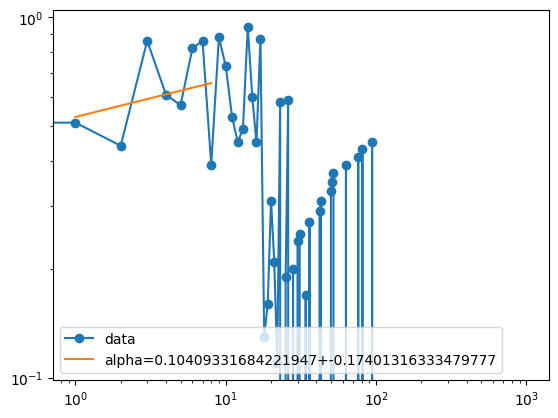

In [15]:
d_pos = [(position[i]-position[i-1])/(time[i]-time[i-1]) for i in range(1,t_max)]

t_fit_max = 10
b,w,E = calculateParametersLSR(np.log2(np.array(time[1:t_fit_max-1])), np.log2(np.array(d_pos[1:t_fit_max-1])))
x_aster = time[1:t_fit_max-1]
y_aster = 2**b*x_aster**(w)

plt.plot(time[:-1], d_pos, 'o-', label='data')
plt.plot(x_aster, y_aster, label=f'alpha={w}+-{E}')
plt.yscale('log')
plt.xscale('log')
plt.legend(loc='best')

In [20]:
greek_leeterz = [chr(code) for code in range(945,970)]

In [21]:
greek_leeterz[11]

'μ'

In [18]:
#How is the network formed? Scale free?

In [19]:
hg.greek_leteerz

AttributeError: module 'hgenotypes' has no attribute 'greek_leteerz'